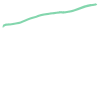

In [45]:
import kml2geojson
from shapely.geometry import Point, LineString

geojson = kml2geojson.main.convert('ns45.kml')
points = LineString([Point(x) for x in geojson[0]['features'][0]['geometry']['coordinates']])
points

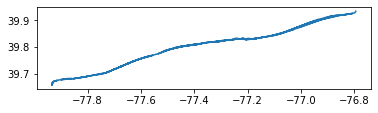

In [46]:
import geopandas as gp

# gs = gp.GeoSeries(geojson[0]['features'])
# gs = gp.GeoDataFrame([geojson[0]['features'][0]])
gs = gp.GeoSeries(points)
ax = gs.plot()
# points.plot()

<AxesSubplot:>

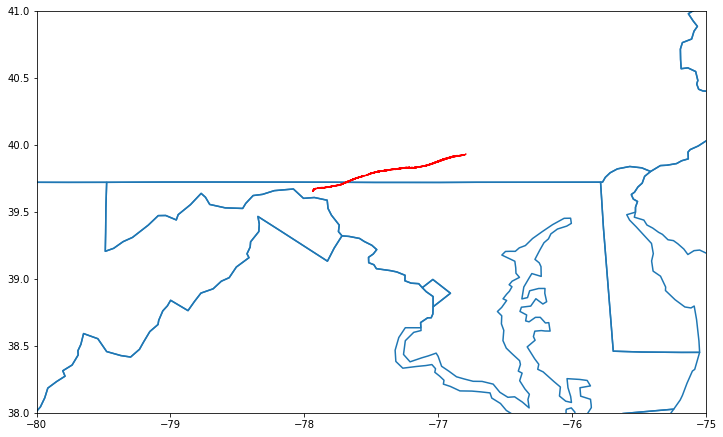

In [48]:
states = gp.read_file('cb_2018_us_state_20m.shp')
stateplot = states.boundary.plot(figsize=(12, 12))
stateplot.set_xlim(-80, -75)
stateplot.set_ylim(38, 41)
gs.plot(ax=stateplot, color='r')

In [274]:
df.columns

Index(['time', ' lat [deg]', ' lng [deg]', ' alt [m]'], dtype='object')

In [1]:
import os
import kml2geojson
from shapely.geometry import Point, LineString
import geopandas as gp

# Double check: 66, 62, 

adj = {
    'ns50.kml': (0,89),
    'ns62.kml': (0,-5000),
    'ns66.kml': (2100,0),
    'ns102b.kml': (690,1370),
    'ns84.kml': (0,1040),
    'ns86.kml': (0,800),
    'ns97.kml': (0,1110),
    'ns98.kml': (0,890),
    'ns100.kml': (0,850),
    'ns112.kml': (0,800),
    'ns114.kml': (0,980),
    'ns117.kml': (0,1250),
    'ns111a.kml': (0,1170),
    'ns46.kml': (2,218),
    'ns48.kml': (0,116),
    'ns72.kml': (0,7100),
    'ns78.kml': (1,146),
    'ns82.kml': (0,8500),
    'ns92.kml': (4,-1),
    'ns93.kml': (4,-1),
    'ns94.kml': (4,9500),
    'ns103.kml': (7,-1),
    'ns115.kml': (145,-1),
}

lines = []
for fname in os.listdir('kml'):
    if '.kml' in fname:
        print(fname, end='\r')
        geojson = kml2geojson.main.convert('kml/'+fname)
    
#         if geojson[0]['features'][0]['geometry']['type'] == 'GeometryCollection':
#             points = [Point(x) for x in geojson[0]['features'][0]['geometry']['geometries'][0]['coordinates']]
#         else:
#             points = [Point(x) for x in geojson[0]['features'][0]['geometry']['coordinates']]

        if geojson[0]['features'][0]['geometry']['type'] == 'GeometryCollection':
            points = [Point(x) for x in geojson[0]['features'][0]['geometry']['geometries'][0]['coordinates']]
        else:
            points = []
            for ft in geojson[0]['features']:
                if ft['geometry']['type'] == 'LineString':
                    points += ft['geometry']['coordinates']
                    
        if fname in adj:
            points = points[adj[fname][0]:adj[fname][1]]

        line = LineString(points)
        lines.append(line)
        
gs = gp.GeoSeries(lines)

<AxesSubplot:>

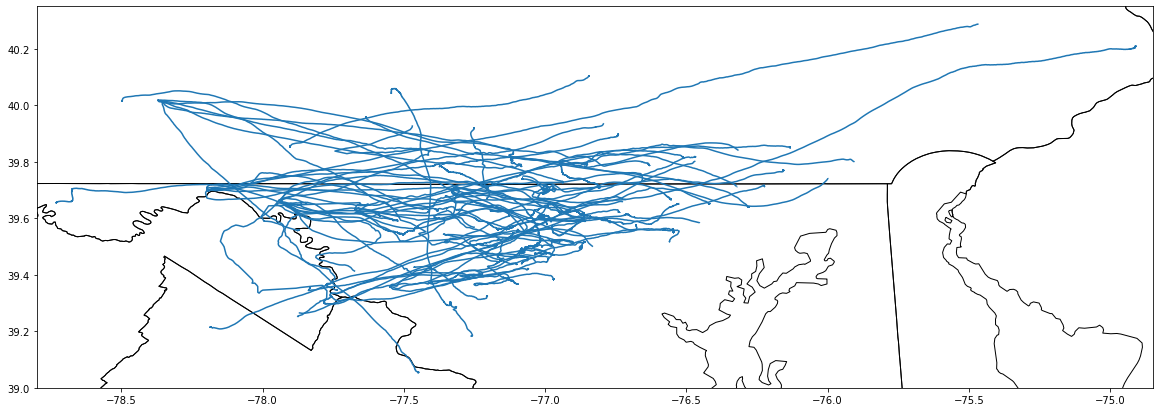

In [6]:
states = gp.read_file('cb_2018_us_state_5m/cb_2018_us_state_5m.shp')
stateplot = states.boundary.plot(figsize=(20, 20), color='black', linewidth=1)
stateplot.set_xlim(-78.8, -74.85)
stateplot.set_ylim(39.0, 40.35)

lines2 = lines
gs = gp.GeoSeries(lines2)
gs.plot(ax=stateplot,
#         color=['r', 'g'],
#         cmap='tab10',
#         linewidth=3,
        markersize=3,
       )

In [1]:
# base env

import cartopy

<AxesSubplot:>

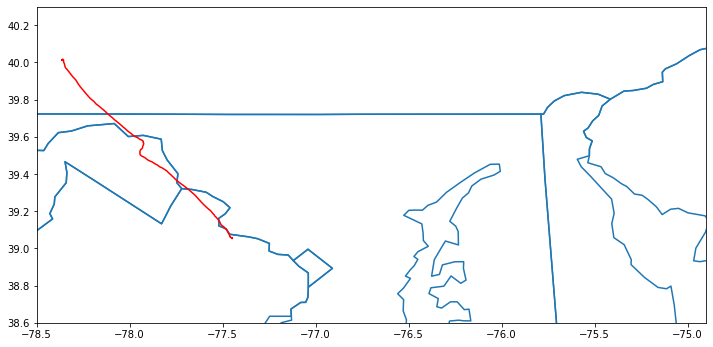

In [137]:
import kml2geojson
from shapely.geometry import Point, LineString
import geopandas as gp

adj = {
    'ns50.kml': (0,89),
    'ns62.kml': (0,-5000),
    'ns66.kml': (2100,0),
    'ns102b.kml': (690,1370),
    'ns84.kml': (0,1040),
    'ns86.kml': (0,800),
    'ns97.kml': (0,1110),
    'ns98.kml': (0,890),
    'ns100.kml': (0,850),
    'ns112.kml': (0,800),
    'ns114.kml': (0,980),
    'ns117.kml': (0,1250),
    'ns111a.kml': (0,1170),
    'ns46.kml': (2,218),
    'ns48.kml': (0,116),
    'ns72.kml': (0,7100),
    'ns78.kml': (1,146),
    'ns82.kml': (0,8500),
    'ns92.kml': (4,-1),
    'ns93.kml': (4,-1),
    'ns94.kml': (4,9500),
    'ns103.kml': (7,-1),
    'ns115.kml': (145,-1),
}

fname = 'ns117.kml'

geojson = kml2geojson.main.convert('kml/'+fname)
if geojson[0]['features'][0]['geometry']['type'] == 'GeometryCollection':
    print('ddf')
    points = [Point(x) for x in geojson[0]['features'][0]['geometry']['geometries'][0]['coordinates']]
else:
    points = []
    for ft in geojson[0]['features']:
        if ft['geometry']['type'] == 'LineString':
#             points += [(x[0], x[1]) for x in ft['geometry']['coordinates']]
            points += ft['geometry']['coordinates']
                    
if fname in adj:
    points = points[adj[fname][0]:adj[fname][1]]
            
# points = list(dict.fromkeys(points))
# points = points[145:1250]
line = LineString(points)
# points = LineString(line)
gs = gp.GeoSeries(line)
# gs = gp.GeoSeries(line)

states = gp.read_file('cb_2018_us_state_20m.shp')
stateplot = states.boundary.plot(figsize=(12, 12))
stateplot.set_xlim(-78.5, -74.9)
stateplot.set_ylim(38.6, 40.3)

gs.plot(ax=stateplot, color='r')

In [7]:
points

[[-77.934, 39.657, 570.0], [-77.934, 39.657, 570.0]]

In [5]:
import itertools
points.sort()
list(k for k,_ in itertools.groupby(points))

[[-77.93417, 39.657, 577.0],
 [-77.93417, 39.657, 580.0],
 [-77.93417, 39.657, 583.0],
 [-77.93417, 39.657, 587.0],
 [-77.93417, 39.657, 590.0],
 [-77.93417, 39.657, 593.0],
 [-77.93417, 39.657, 597.0],
 [-77.93417, 39.657, 603.0],
 [-77.93417, 39.657, 606.0],
 [-77.93417, 39.657, 610.0],
 [-77.93417, 39.657, 613.0],
 [-77.934, 39.657, 0.0],
 [-77.934, 39.657, 570.0],
 [-77.934, 39.657, 577.0],
 [-77.934, 39.657, 580.0],
 [-77.934, 39.657, 583.0],
 [-77.934, 39.657, 587.0],
 [-77.934, 39.657, 590.0],
 [-77.934, 39.657, 593.0],
 [-77.934, 39.657, 597.0],
 [-77.934, 39.657, 603.0],
 [-77.934, 39.657, 606.0],
 [-77.934, 39.65767, 1000.0],
 [-77.9335, 39.659, 1541.0],
 [-77.93333, 39.66083, 2076.0],
 [-77.933, 39.6625, 2608.0],
 [-77.93283, 39.66267, 2703.0],
 [-77.93217, 39.66483, 3264.0],
 [-77.93167, 39.66683, 3730.0],
 [-77.93133, 39.6675, 3910.0],
 [-77.93067, 39.66883, 4277.0],
 [-77.93017, 39.6695, 4478.0],
 [-77.92767, 39.6705, 5075.0],
 [-77.92633, 39.67083, 5380.0],
 [-77.92467, 

<AxesSubplot:>

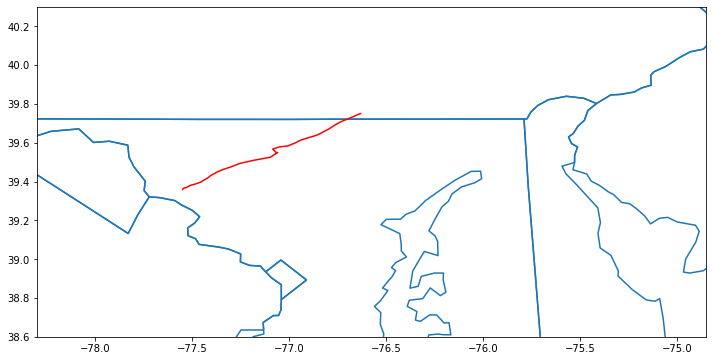

In [64]:
import pandas as pd
from shapely.geometry import Point, LineString
import geopandas as gp

# df = pd.read_csv('ns52.txt', names=['time', 'lad', 'lam', 'las', 'lod', 'lom', 'los', 'alt', ' '])
# df['lat'] = df.apply(lambda x: x['lad'] + x['lam']/60 + x['las']/3600, axis=1)
# df['lon'] = df.apply(lambda x: x['lod'] + x['lom']/-60 + x['los']/-3600, axis=1)
# dd = list(dict.fromkeys(zip(df['lon'], df['lat'])))


# df = pd.read_csv('GPSLOG05.TXT.tar', skiprows=1,)
# df = df.rename(columns = {'$GPRMC': 'Lat', 'V': 'Lon'})
# df = df[::2]
# df = df[pd.to_numeric(df['Lon'], errors='coerce').notnull()]
# df = df[pd.to_numeric(df['Lat'], errors='coerce').notnull()]
# df['Lat'] = df['Lat'].astype(float)
# df['Lon'] = df['Lon'].astype(float)
# df['Lat'] /= 100
# df['Lon'] /= -100
# dd = list(dict.fromkeys(zip(df['Lon'], df['Lat'])))


# with open('W3EAX-8 (CMD top plate).txt.tar', 'r') as f:
#     content = f.readlines()

# lats = [float(x[x.index(': ')+2:x.index(' Â')]) for x in content if 'latitude' in x]
# lons = [float(x[x.index(': ')+2:x.index(' Â')]) for x in content if 'longitude' in x]
# dd = list(dict.fromkeys(zip(lons, lats)))


# with open('ns85.txt', 'r') as f:
#     content = f.readlines()

# content = [x for x in content if not 'INVAL' in x and not 'Altitude' in x and not x=='\n' and not '\x00' in x]
# content = [(x[9:x.index(',')], x[x.index(',')+1:x.index('/')]) for x in content if not 'INVAL' in x and not 'Altitude' in x and not x=='\n' and not '\x00' in x]
# content = [(float(x[1]), float(x[0])) for x in content if not x[0] == '']
# dd = content
    
    
df = pd.read_csv('NS66_parsedPackets.txt.tar', names=['time', 'Lat', 'Lon', ' ', 'f', 'u', 'c'], skiprows=9, encoding= 'unicode_escape')
dd = list(dict.fromkeys(zip(df['Lon'], df['Lat'])))

# dd = list(dict.fromkeys(zip(df[' lng [deg]'], df[' lat [deg]'])))

# df = df[pd.to_numeric(df['Lon'], errors='coerce').notnull()]
# df = df[pd.to_numeric(df['Lat'], errors='coerce').notnull()]
# dd = list(dict.fromkeys(zip(df['Lon'].astype(float), df['Lat'].astype(float))))

# # dd = list(dict.fromkeys(zip(df['Sec'], df['Min'])))


dd = [x for x in dd if x[0] < -74 and x[1] > 38]

dd2 = dd
line = LineString(dd2)
gs = gp.GeoSeries(line)

states = gp.read_file('cb_2018_us_state_20m.shp')
stateplot = states.boundary.plot(figsize=(12, 12))
stateplot.set_xlim(-78.3, -74.85)
stateplot.set_ylim(38.6, 40.3)

gs.plot(ax=stateplot, color='r')

In [152]:
gp.io.file.fiona.drvsupport.supported_drivers['LIBKML'] = 'rw'
gp.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
# gs.to_file("kml/ns46.kml", driver='KML')
gs.to_file('all.kml', driver='KML')

C:\Users\aspen\anaconda3\envs\torarchive\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [81]:
geojson

[{'type': 'FeatureCollection',
  'features': [{'type': 'Feature',
    'properties': {'name': 'Bounder Flight',
     'fill': '#004d3b',
     'fill-opacity': 0.62,
     'stroke': '#004d3b',
     'stroke-opacity': 0.62,
     'stroke-width': 1},
    'geometry': {'type': 'LineString',
     'coordinates': [[-76.97484, 39.57149, 223.18],
      [-76.97483, 39.57149, 224.89],
      [-76.97483, 39.5715, 226.35],
      [-76.97483, 39.57151, 224.64],
      [-76.97482, 39.5715, 223.0],
      [-76.97482, 39.5715, 223.74],
      [-76.97481, 39.57149, 225.14],
      [-76.97481, 39.57149, 224.98],
      [-76.9748, 39.57149, 224.87],
      [-76.9748, 39.57149, 224.52],
      [-76.9748, 39.57149, 224.57],
      [-76.9748, 39.5715, 223.6],
      [-76.9748, 39.5715, 222.61],
      [-76.9748, 39.57149, 221.98],
      [-76.9748, 39.57149, 222.43],
      [-76.9748, 39.57149, 222.77],
      [-76.9748, 39.57149, 222.16],
      [-76.9748, 39.57149, 222.14],
      [-76.9748, 39.57149, 222.05],
      [-76.9748, 39

In [ ]:
points = []
for ft in geojson[0]['features']:
    if ft['geometry']['type'] == 'LineString':
        points += ft['geometry']['coordinates']